## Bibliothek importieren und Datensatz laden

In [1]:
import deepwaveform as dwf
df = dwf.load_dataset("../data/Elbabschnitt/all_data_edit.txt")

## Datensatz in eine passende Form bringen und Trainingsprozess initialisieren

In [2]:
dataset = dwf.WaveFormDataset(df)           # Bringt den Datensatz in eine passende Form
model = dwf.ConvNet(output_dimension=2)     # Convolutional Neural Network initialisieren
trainer = dwf.Trainer(model,                # Das Modell, das trainiert werden soll
                      dataset,              # Der Datensatz, der dafür verwendet werden soll
                      optimizer=None,       # Der Optimierer, der den Trainingsprozess regelt (für 'None' wird ein Standardoptimierer verwendet)
                      ptrain=0.9,           # Der prozentuale Teil des Datensatzes, der für das Trainings verwendet wird (ptrain=0.9 <=> 90%)
                      batch_size=1024,      # Wie viele Beispiele in einen Optimierungsschritt einfließen sollen
                      epochs=10)             # Wie oft über den kompletten Datensatz iteriert werden soll

## Trainieren und Zwischenergebnisse visualisieren 

epoch=001 E[loss]=0.662 Var[loss]=0.427
epoch=002 E[loss]=0.552 Var[loss]=0.296
epoch=003 E[loss]=0.514 Var[loss]=0.255
epoch=004 E[loss]=0.378 Var[loss]=0.141
epoch=005 E[loss]=0.164 Var[loss]=0.026
epoch=006 E[loss]=0.083 Var[loss]=0.006
epoch=007 E[loss]=0.062 Var[loss]=0.003
epoch=008 E[loss]=0.055 Var[loss]=0.002
epoch=009 E[loss]=0.051 Var[loss]=0.002
epoch=010 E[loss]=0.048 Var[loss]=0.002


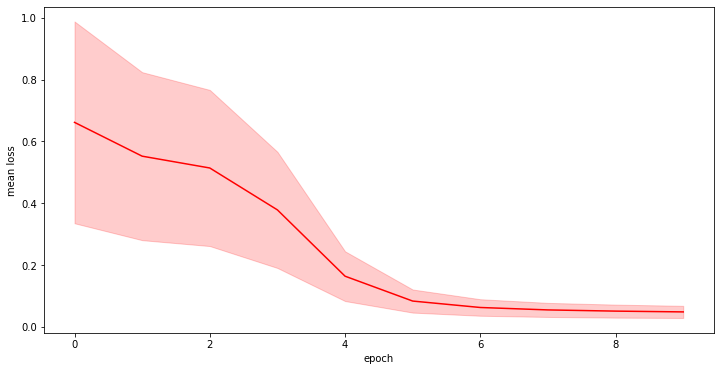

In [3]:
stats = []                                  # Initialisiert eine leere Liste, in der die Ergebnisse akkumuliert werden
for epoch, result in enumerate(trainer.train_classifier(), start=1):   # Trainiert das Modell
    print("epoch=%s E[loss]=%.3f Var[loss]=%.3f" % (str(epoch).zfill(3), result["meanloss"], result["varloss"]))
    stats.append(result)                    # Akkumuliert Zwischenergebnisse
dwf.plot_training_progress(stats)           # Plotted die Zwischenergebnisse

Der Trainingsfortschritt über die Epochen - je niedriger, desto weniger Fortschritt wird in jeder Iteration erzielt. Das ist ein Zeichen dafür, dass die Güte der Parameter zu einem lokalen Minimum konvergiert.

---

## Plotten der Confusion Matrix

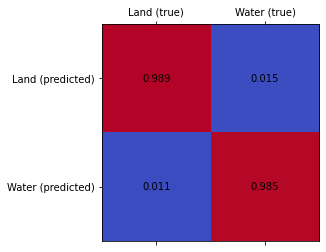

In [4]:
dwf.plot_confusion_matrix(model, dataset, classidx_to_name={0: "Land", 1: "Water"})

## Speichern und Laden des Modells

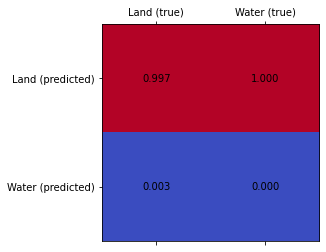

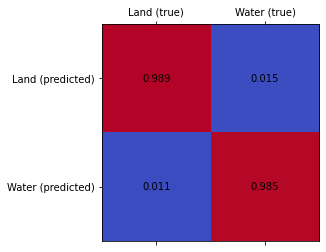

In [5]:
import torch
torch.save(model.state_dict(), "model_classifier.pt")               # Speichert die Parameter des Modells
loaded_model = dwf.ConvNet(output_dimension=2)                      # Erstellt ein neues Modell
dwf.plot_confusion_matrix(loaded_model, dataset)                    # ...das nicht besonders gut zwischen Land und Wasser unterscheiden kann
loaded_model.load_state_dict(torch.load("model_classifier.pt"))     # lädt die gespeicherten Parameter in das neue Modell
dwf.plot_confusion_matrix(loaded_model, dataset)                    # ...welches im Anschluss deutlich besser klassifizieren kann.